ANALISIS EXPLORATORIO DE DATOS YELP

ARCHIVO REVIEW.JSON

se realiza la carga desde drive con el archivo json y se pasa a csv para ser mas faciel de leer por colab , debido a que de otra manera nos limitaba la cantidad de memoria

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import json

In [ ]:
import pandas as pd

# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Definir la ruta al archivo JSON
file_path = '/content/drive/My Drive/set_de_datos_Yelp/review (1).json'

# Definir el tamaño del chunk (número de líneas por chunk)
chunk_size = 1000  # Puedes ajustar este valor según sea necesario

# Lista para almacenar los DataFrames procesados
results = []

# Leer el archivo JSON en chunks
chunks = pd.read_json(file_path, lines=True, chunksize=chunk_size)

# Procesar cada chunk por separado
for i, chunk in enumerate(chunks):
    # Procesar el chunk como sea necesario
    print(f"Procesando chunk {i + 1}")

    # Ejemplo de procesamiento: mostrar las primeras filas del chunk
    print(chunk.head())

    # Guardar resultados intermedios en una lista
    results.append(chunk)

    # Liberar memoria si no necesitas almacenar los chunks completos
    del chunk

# Combinar todos los chunks procesados en un solo DataFrame final
final_df = pd.concat(results, ignore_index=True)

# Mostrar el DataFrame final
print(final_df.head())

# Guardar el DataFrame final en un archivo CSV
intermediate_file_path = '/content/drive/My Drive/set_de_datos_Yelp/final_dataframe.csv'
final_df.to_csv(intermediate_file_path, index=False)

# Liberar memoria después de guardar
del final_df
del results
import gc
gc.collect()

# Ahora puedes cargar 'final_dataframe.csv' en cualquier momento para operar sobre él
loaded_df = pd.read_csv(intermediate_file_path)

# Ejemplo de operaciones sobre el DataFrame cargado
print(loaded_df.head())


Se han truncado las últimas 5000 líneas del flujo de salida.
6754001  Not good at all ordered broiled seafood combo ... 2017-05-07 00:03:55  
6754002  Johnny took good care of our needs from the ti... 2018-10-06 00:04:34  
6754003  The last two times we've gone after 9pm for $1... 2019-09-21 05:13:34  
6754004  Great selection at the quaint little shop. I h... 2019-11-17 18:28:56  
Procesando chunk 6756
                      review_id                 user_id  \
6755000  4LwNCD456tVVHbjRnUAeyQ  jOuRryM8C9bmfbGFXvpQ1w   
6755001  ybyCLxP6F9Cam-mp3nyfMA  BBOujoiXlzfz2BLZCpmGOQ   
6755002  2P3TUj9AG6Q9IHcEXGdpgA  NoCU-u5QjqXnCE-kD8vi8w   
6755003  RpBiwmYBmgb-SgxpZKL9bQ  HrIAVx6HUnPrUXTKbxZfig   
6755004  PEcuL6U3ATiitfPH467aJg  ZalLub5ALr-efeCimUzfZQ   

                    business_id  stars  useful  funny  cool  \
6755000  JFShrvfR86GnWUaITaGRkA      1       0      1     0   
6755001  LgaPsosgAnyNst8X--xnIA      3       1      0     1   
6755002  LsqrLBwo4-VGuwATGAfJ5A      2       0   

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Se realiza un filtrado con los negocios de California y dejar las reviews de dicho estado

In [4]:
import pandas as pd
# Ahora puedes cargar 'final_dataframe.csv' en cualquier momento para operar sobre él
intermediate_file_path = '/content/drive/My Drive/set_de_datos_Yelp/final_dataframe.csv'
loaded_df = pd.read_csv(intermediate_file_path)



In [5]:
import pandas as pd
# Ahora puedes cargar 'final_dataframe.csv' en cualquier momento para operar sobre él
ruta = '/content/drive/My Drive/set_de_datos_Yelp/business_california.xlsx'
business_df = pd.read_excel(ruta)


In [6]:
#Filtrar las reseñas solo para los business_ID específicos del archivo Excel
filtered_reviews = loaded_df[loaded_df['business_id'].isin(business_df['business_id'])]

In [7]:
filtered_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231099 entries, 14 to 6990245
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    231099 non-null  object 
 1   user_id      231099 non-null  object 
 2   business_id  231099 non-null  object 
 3   stars        231099 non-null  float64
 4   useful       231099 non-null  float64
 5   funny        231099 non-null  float64
 6   cool         231099 non-null  float64
 7   text         231099 non-null  object 
 8   date         231099 non-null  object 
dtypes: float64(4), object(5)
memory usage: 17.6+ MB


In [8]:
filtered_reviews.to_csv('/content/drive/My Drive/set_de_datos_Yelp/review_ca.csv', index=False)

COMENZAMOS EXPLORANDO LA ESTRUCTURA DEL DATASET

verificamos cantidad de filas y  columnas, nombres de columnas y tiposde datos


In [ ]:
# Ejemplo de operaciones sobre el DataFrame cargado
print(filtered_reviews.head(10))

                  review_id                 user_id             business_id  \
14   UBp0zWyH60Hmw6Fsasei7w  4Uh27DgGzsp6PqrH913giQ  otQS34_MymijPTdNBoBdCw   
49   cvQXRFLCyr0S7EgFb4lZqw  ZGjgfSvjQK886kiTzLwfLQ  EtKSTHV5Qx_Q7Aur9o4kQQ   
54   rV6AWGN4rYORMQY8dVP41g  dKoIp8vsKFH4cbmGSYy2IQ  0ICfbEImE0gUZc4kSZ7QHg   
67   Ad91EzbAGRCR1SwkPfZJKg  LWTvg7RlyNLXIf482tXBPw  WCVFqK84i2H5EClSoow7ZA   
74   EZarjNNbO_2yH1Xbizog9g  R_W9WlKiA56VzVbRzTULQQ  pR8u8hXf1vvzoAGOoKHQqQ   
89   r1tPwFMILy0COeEQ-B3YLw  3M1_pyDSgMP6sRMz564eJw  8xM8akbQhHDQdJO1sPMB1A   
152  UD0AKHQQHSzYsbCkdM7Xrw  Au2RZKzmrr75h2bBpb60oA  tJCnUtGdyPyOGt5kudLrTA   
184  -xM8cH4AeVzgTJBQHlxfUQ  ZaMB7VbOwaARjxdhXjODxA  EtKSTHV5Qx_Q7Aur9o4kQQ   
213  Oqh_qiy0kUEYY0IScSYTaQ  dCOonQ7Md1ooief37g1SHw  rrD5LY3nkyKMg1CYKKZomQ   
231  XDvCtch6U43HUNuMLHSxHA  AGyh5jnM0zrIElY7aZQafQ  5ezrDoezdUlJpUa5Jg6dUQ   

     stars  useful  funny  cool  \
14     4.0     0.0    2.0   0.0   
49     5.0     3.0    1.0   1.0   
54     5.0     1.0    0.0

In [ ]:
filtered_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231099 entries, 14 to 6990245
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   review_id    231099 non-null  object 
 1   user_id      231099 non-null  object 
 2   business_id  231099 non-null  object 
 3   stars        231099 non-null  float64
 4   useful       231099 non-null  float64
 5   funny        231099 non-null  float64
 6   cool         231099 non-null  float64
 7   text         231099 non-null  object 
 8   date         231099 non-null  object 
dtypes: float64(4), object(5)
memory usage: 17.6+ MB


In [ ]:
filtered_reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

Conclusion: nos encontramos con un archivo compuesto de 231099 filas y 9 columnas las cuales son:

review_id    str
user_id      str

business_id  str

stars        float64

useful       float64

funny        float64

cool         float64

text         str

date         str

     

V

LIMPIEZA DE DATOS

Identificamos los valores nulos, los duplicados y las inconsistencias.

In [9]:
# Calcular valores nulos y porcentajes
valores_nulos = filtered_reviews.isnull().sum()
porcentajes = (valores_nulos / filtered_reviews.shape[0]) * 100  # Calcula el porcentaje respecto al número total de filas del DataFrame
print(porcentajes)


review_id      0.0
user_id        0.0
business_id    0.0
stars          0.0
useful         0.0
funny          0.0
cool           0.0
text           0.0
date           0.0
dtype: float64


In [10]:
# Contar las ocurrencias de cada fila duplicada
duplicate_counts = filtered_reviews[filtered_reviews.duplicated()].sum()

# Mostrar el conteo de duplicados
print("Conteo de valores duplicados:")
print(duplicate_counts)

Conteo de valores duplicados:
Series([], Name: count, dtype: int64)


In [15]:
# Cuenta el total de valores duplicados en la columna 'user_id'
total_duplicates = filtered_reviews['user_id'].duplicated().sum()


In [17]:
print(total_duplicates)

61815


Conclusion:
NO se encontraron valores nulos y no existen duplicados en el dataframe

In [ ]:
filtered_reviews.describe()

,stars,useful,funny,cool
count,231099.000000,231099.000000,231099.000000,231099.000000
mean,3.747039,1.208396,0.328552,0.502378
std,1.485385,2.931120,1.434881,2.071943
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,0.000000,0.000000
max,5.000000,170.000000,103.000000,166.000000


Conclusiones Generales:
Análisis de las Estadísticas Descriptivas
Stars (Estrellas):

El promedio de 3.75 sugiere que, en promedio, las reseñas tienden a estar cerca de 3.75 estrellas, lo cual indica una tendencia hacia valoraciones positivas moderadas.

La desviación estándar de 1.49 indica que las calificaciones tienden a variar bastante alrededor de la media, mostrando una distribución relativamente dispersa de las calificaciones.

Useful (Útil):

El promedio de 1.21 indica que, en promedio, las reseñas reciben aproximadamente 1.21 votos útiles.

La desviación estándar de 2.93 sugiere una variabilidad considerable en la cantidad de votos útiles recibidos, lo que puede reflejar opiniones diversas sobre la utilidad de las reseñas.

Funny (Divertido):
El promedio de 0.33 indica que las reseñas tienden a recibir pocos votos de "divertido".
La desviación estándar de 1.43 muestra que la cantidad de votos de "divertido" varía notablemente entre las reseñas.

Cool (Genial):
El promedio de 0.50 indica que las reseñas reciben en promedio medio voto de "genial".
La desviación estándar de 2.07 muestra una variabilidad significativa en la cantidad de votos de "genial".

Análisis de la Columna de Estrellas (Ratings)
Veamos la distribución de las estrellas otorgadas en las reseñas.

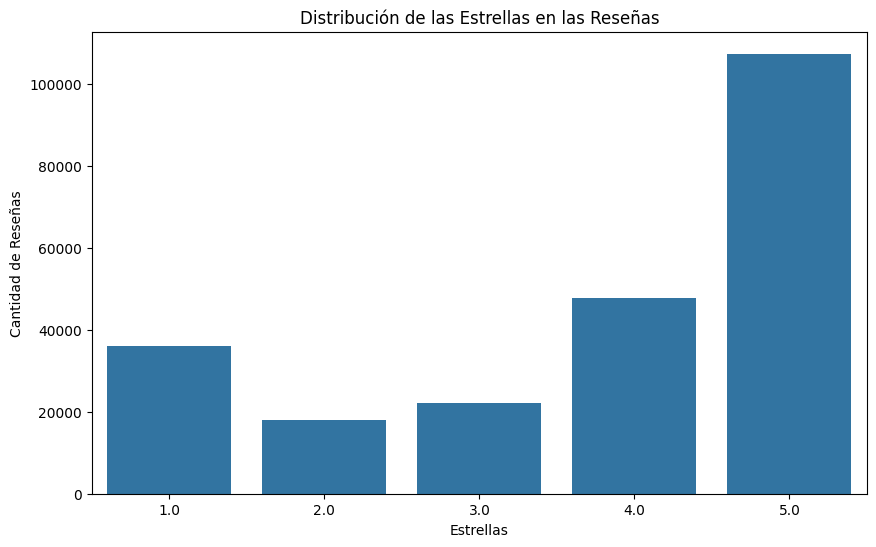

In [ ]:
# Distribución de las estrellas (ratings)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='stars', data=filtered_reviews)
plt.title('Distribución de las Estrellas en las Reseñas')
plt.xlabel('Estrellas')
plt.ylabel('Cantidad de Reseñas')
plt.show()

In [ ]:
Conclusion , se visualiza que la mayor cantidad de reseñas tiene entre 4 y 5 estrellas

Análisis Temporal

Observa cómo han cambiado las reseñas a lo largo del tiempo.

<ipython-input-35-ae1ac8f361a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_reviews['date'] = pd.to_datetime(filtered_reviews['date'], errors='coerce')
<ipython-input-35-ae1ac8f361a5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_reviews['year'] = filtered_reviews['date'].dt.year


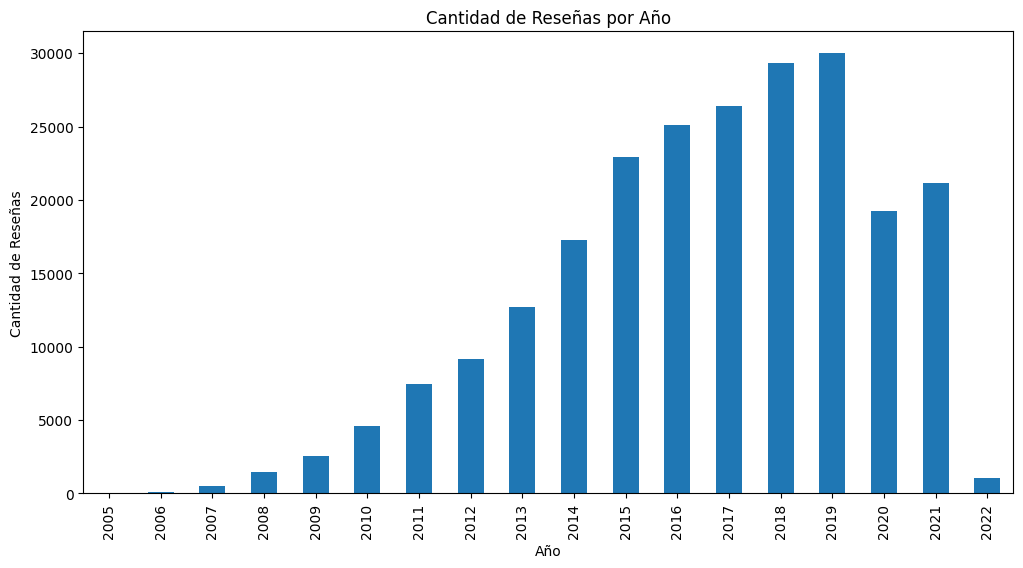

In [ ]:
# Convertir la columna 'date' a datetime
filtered_reviews['date'] = pd.to_datetime(filtered_reviews['date'], errors='coerce')

# Extraer el año de la columna 'date'
filtered_reviews['year'] = filtered_reviews['date'].dt.year

# Contar las reseñas por año
resenias_por_ano = filtered_reviews['year'].value_counts().sort_index()

# Graficar las reseñas por año
plt.figure(figsize=(12, 6))
resenias_por_ano.plot(kind='bar')
plt.title('Cantidad de Reseñas por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Reseñas')
plt.show()

se verifica un aumento de reseñas significativas a partir de año 2010 al 2019, luego desciende.

Análisis de Texto

Para el análisis de texto, comezamos con una revisión básica de las palabras más comunes.

<ipython-input-37-a0a08a21b449>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_reviews['text'] = filtered_reviews['text'].astype(str).fillna('')


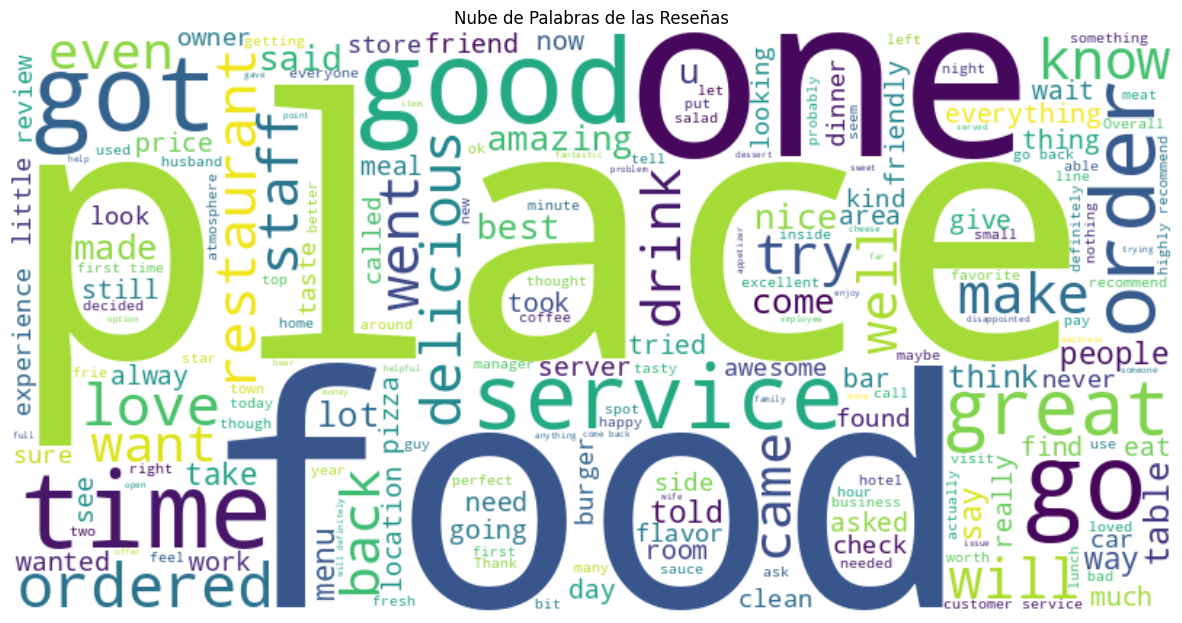

In [ ]:
from wordcloud import WordCloud

# Convertir la columna 'text' a string y manejar valores nulos
filtered_reviews['text'] = filtered_reviews['text'].astype(str).fillna('')

# Crear un texto con todas las reseñas
texto_completo = " ".join(review for review in filtered_reviews['text'])

# Generar una nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_completo)

# Mostrar la nube de palabras
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de las Reseñas')
plt.show()


Con el análisis básico de la columna texto se verifica que la mayoria de palabras se refiren a lugares de comida y en su mayoria evidencian buenas reseñas